Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.
Нам необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

In [1]:
###!pip install pandas==1.2.4

In [2]:
!pip install matplotlib==3.5.1

     |████████████████████████████████| 11.2 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 63.5 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [3]:
pip install shap

     |████████████████████████████████| 539 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 13.5 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 93.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [5]:
!pip install phik -q

In [6]:
#####!pip install matplotlib --upgrade

In [7]:
import pandas as pd

In [8]:
import numpy as np
import matplotlib as ml

In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.metrics import f1_score

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
import seaborn as sns

In [14]:
from sklearn.svm import SVC 

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [23]:
from sklearn.compose import ColumnTransformer

In [24]:
import shap

In [25]:
import phik

## Шаг 1. Загрузка данных

### 1.1 Загрузим данные.

In [26]:
market_file=pd.read_csv('/datasets/market_file.csv', decimal = '.')

In [27]:
market_money=pd.read_csv('/datasets/market_money.csv', decimal = '.')

In [28]:
market_time=pd.read_csv('/datasets/market_time.csv', decimal = '.')

In [29]:
money=pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')

### 1.2 Проверим, что данные в таблицах соответствуют описанию. Исследованием и объединением данных займёмся позже.

In [30]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [31]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [32]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [33]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [34]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Шаг 2. Предобработка данных

первым делом приведем в соответствие наименование атрибутов, проблема с наименованием у нас есть только в market_file

In [35]:
market_file=market_file.rename(columns={'Покупательская активность': 'Покупательская_активность', 'Тип сервиса': 'Тип_сервиса', 'Разрешить сообщать': 'Разрешить_сообщать'})

далее  проверим на проапуски 

In [36]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_сервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [37]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [38]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [39]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Пропуски в наших данных отсутсвуют

Проведя предварительный анализ, можно сказать что с типами данных так же все впорядке

Далее проверим на дубликаты все наши данные и в случае их наличия удалим их

In [40]:
market_file[market_file.duplicated()==True]

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит


In [41]:
market_money[market_money.duplicated()==True]

,id,Период,Выручка


In [42]:
market_time[market_time.duplicated()==True]

,id,Период,минут


In [43]:
money[money.duplicated()==True]

,id,Прибыль


Дубли отсутствуют

Далее Проверим на уникальность категорийные признаки
Покупательская_активность ['Популярная_категория'] Тип_сервиса Разрешить_сообщать
graf=market_money.groupby('Период')['Период']


In [44]:
market_file['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [45]:
market_file['Покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [46]:
market_file['Тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Очевидно, что у нас проблема со значениями в атрибуте Тип_сервиса, есть явная описка, устраним данную проблему

In [47]:
market_file['Тип_сервиса']=market_file['Тип_сервиса'].str.replace('стандартт', 'стандарт')

In [48]:
market_file['Разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [49]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [50]:
market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Очевидно, что у нас проблема со значениями в атрибуте Период, есть явная описка, устраним данную проблему

In [51]:
market_time['Период']=market_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

## Шаг 3. Исследовательский анализ данных
Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

Предварительно отберем клиентов которые совершали покупки в течении последних 3х месяцев

In [52]:
list_cli=pd.DataFrame(market_money.groupby(['id','Период'])['Выручка'].sum())

In [53]:
list_cli=pd.DataFrame(list_cli[list_cli['Выручка']>0].groupby('id')['Выручка'].count())


In [54]:
market_file=market_file.join(list_cli,on='id',how='inner')

In [55]:
market_file=market_file[market_file['Выручка']==3]

In [56]:
market_file

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,3
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,3
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,3
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,3
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,3
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,3
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,3


In [57]:
market_file=market_file.drop('Выручка',axis=1)

### Проведем статистический анализ всех признаков в датасете market_file.

In [58]:
market_file.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


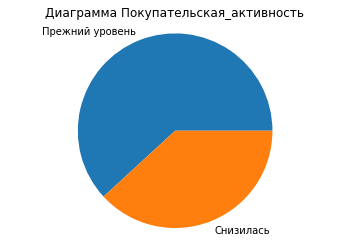

In [59]:
graf=market_file.groupby('Покупательская_активность')['Покупательская_активность'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Диаграмма Покупательская_активность")
plt.show()

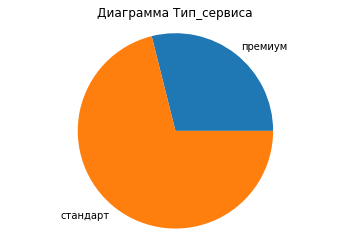

In [60]:
graf=market_file.groupby('Тип_сервиса')['Тип_сервиса'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Диаграмма Тип_сервиса")
plt.show()

проверим как теперь выглядит наша диаграма

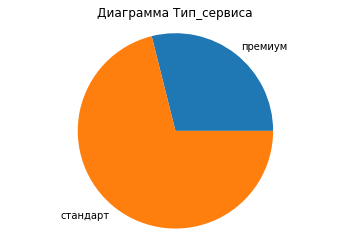

In [61]:
graf=market_file.groupby('Тип_сервиса')['Тип_сервиса'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Диаграмма Тип_сервиса")
plt.show()

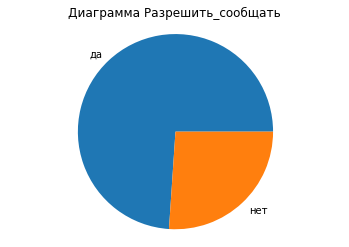

In [62]:
graf=market_file.groupby('Разрешить_сообщать')['Разрешить_сообщать'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Диаграмма Разрешить_сообщать")
plt.show()

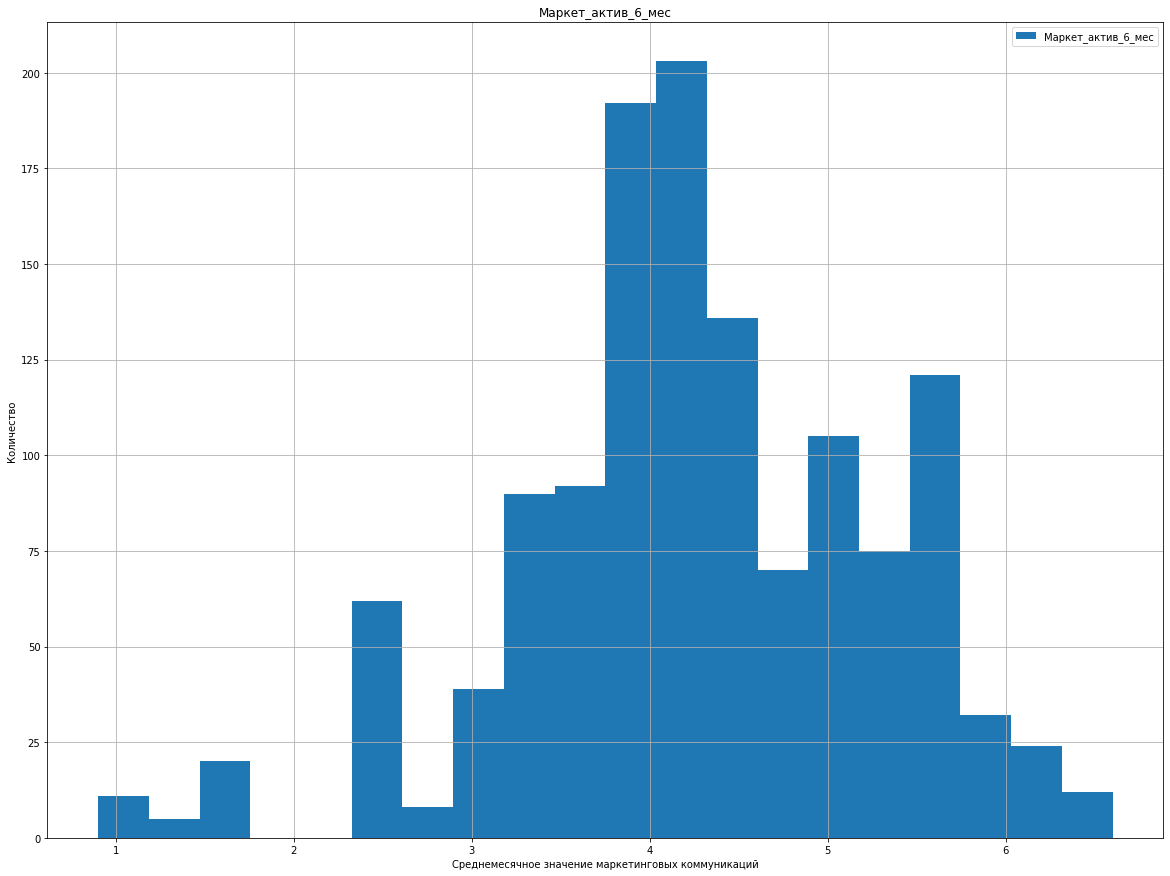

In [63]:
(market_file['Маркет_актив_6_мес']).hist(figsize=(20, 15),bins=20, legend=True)
plt.xlabel('Среднемесячное значение маркетинговых коммуникаций')
plt.ylabel('Количество')

plt.title("Маркет_актив_6_мес");


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


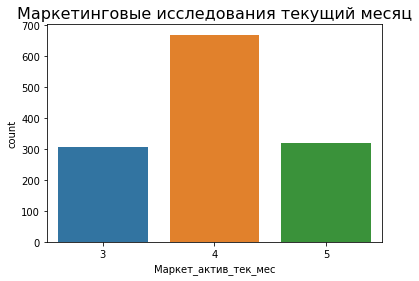

In [64]:
# Get the current figure and axes objects. from @GarrettCGraham code
fig, ax = plt.gcf(), plt.gca()

ax.set_title('Маркетинговые исследования текущий месяц', fontsize=16)

sns.countplot(market_file['Маркет_актив_тек_мес'], x="class");
plt.show()




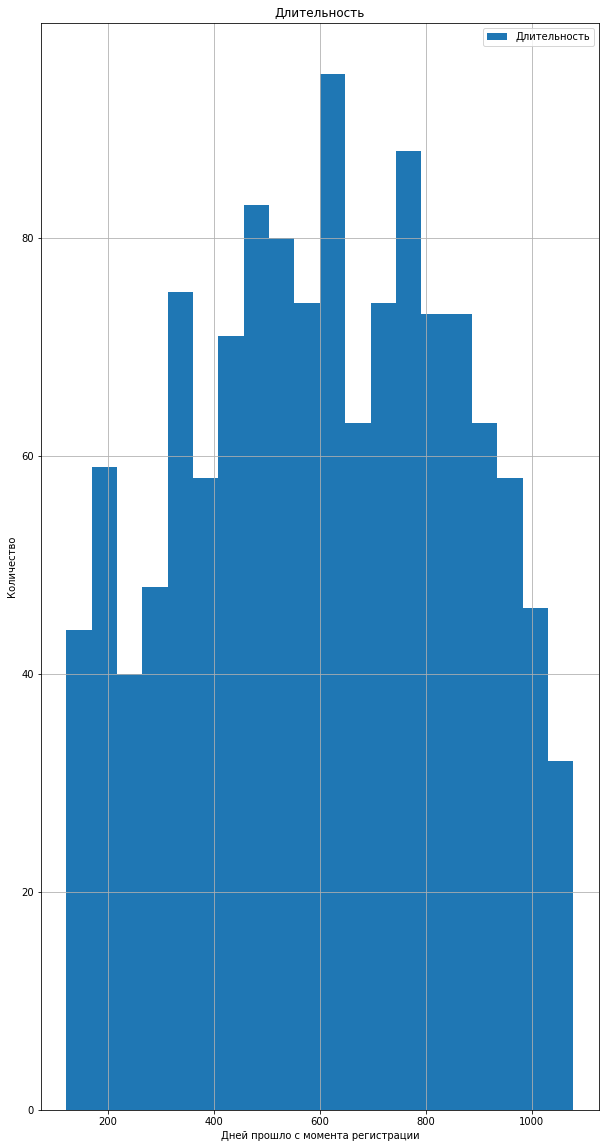

In [65]:
(market_file['Длительность']).hist(figsize=(10, 20),bins=20, legend=True)
plt.xlabel('Дней прошло с момента регистрации')
plt.ylabel('Количество')
plt.title("Длительность");

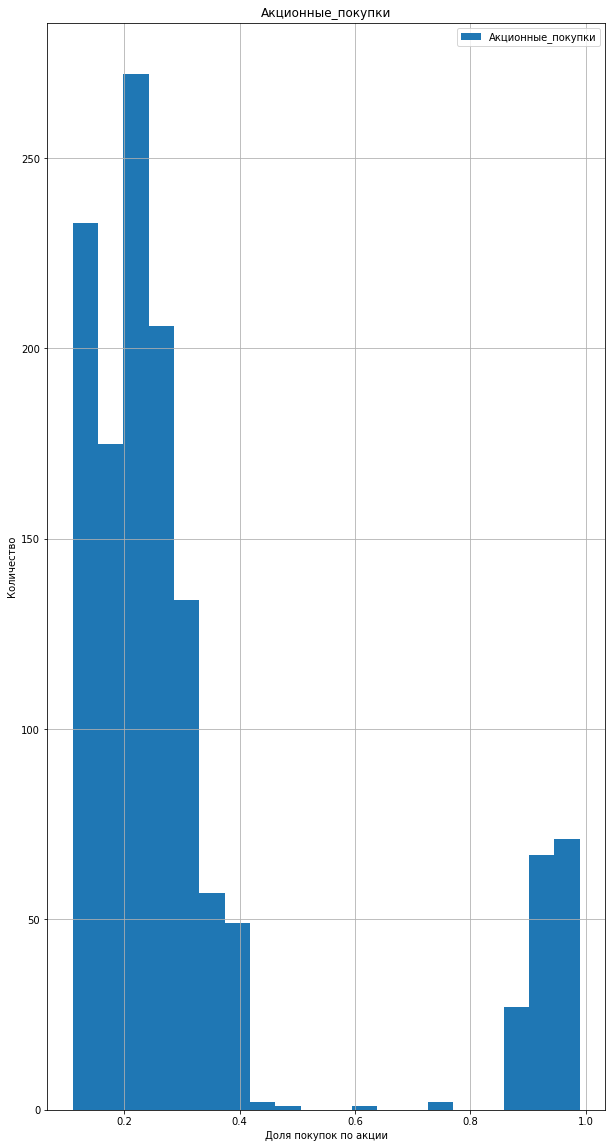

In [66]:
(market_file['Акционные_покупки']).hist(figsize=(10, 20),bins=20, legend=True)
plt.xlabel('Доля покупок по акции')
plt.ylabel('Количество')
plt.title("Акционные_покупки");

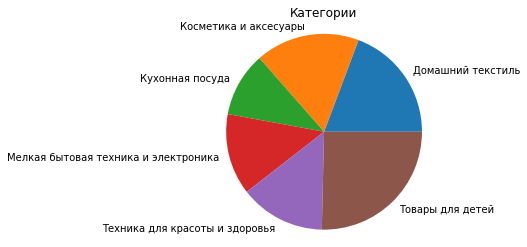

In [67]:
graf=market_file.groupby('Популярная_категория')['Популярная_категория'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Категории")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


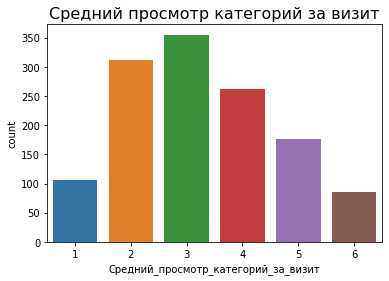

In [68]:


#sns.countplot(market_file['Средний_просмотр_категорий_за_визит'], x="class");
# Get the current figure and axes objects. from @GarrettCGraham code
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Средний просмотр категорий за визит', fontsize=16)

sns.countplot(market_file['Средний_просмотр_категорий_за_визит'], x="class");
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


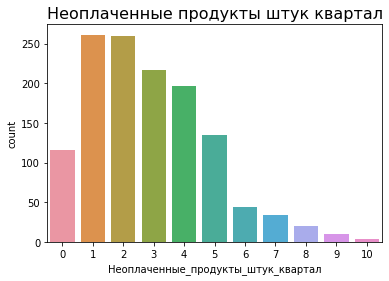

In [69]:
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Неоплаченные продукты штук квартал', fontsize=16)
sns.countplot(market_file['Неоплаченные_продукты_штук_квартал'], x="class");

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


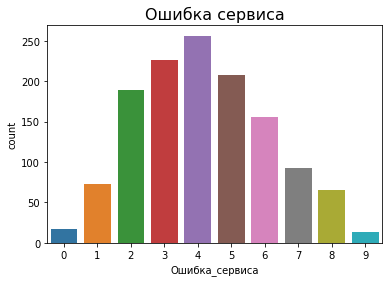

In [70]:
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Ошибка сервиса', fontsize=16)
sns.countplot(market_file['Ошибка_сервиса'], x="class");

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


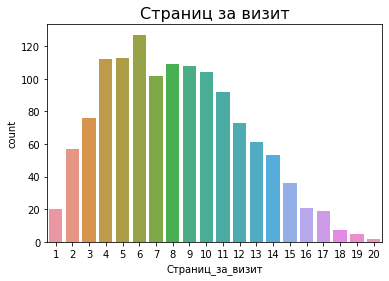

In [71]:
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Страниц за визит', fontsize=16)
sns.countplot(market_file['Страниц_за_визит'], x="class");

У нас имеются выбросы в атрибутах Маркет_актив_6_мес и Маркет_актив_тек_мес. Возможно эти выбросы между собой связаны, т.к. находятся на 4х маркетиговых взаимодействиях и в  Маркет_актив_тек_мес был всплекс. Так же у нас имеются выбросы в Маркет_актив_тек_мес, похоже их нужно убрать из наших данных

### Проведем статистический анализ всех признаков в датасете market_money

In [72]:
market_money

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


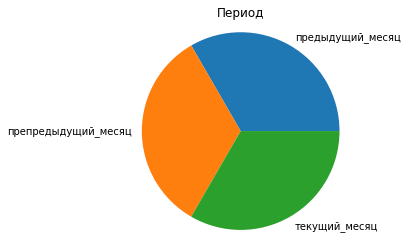

In [73]:
graf=market_money.groupby('Период')['Период'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Период")
plt.show()

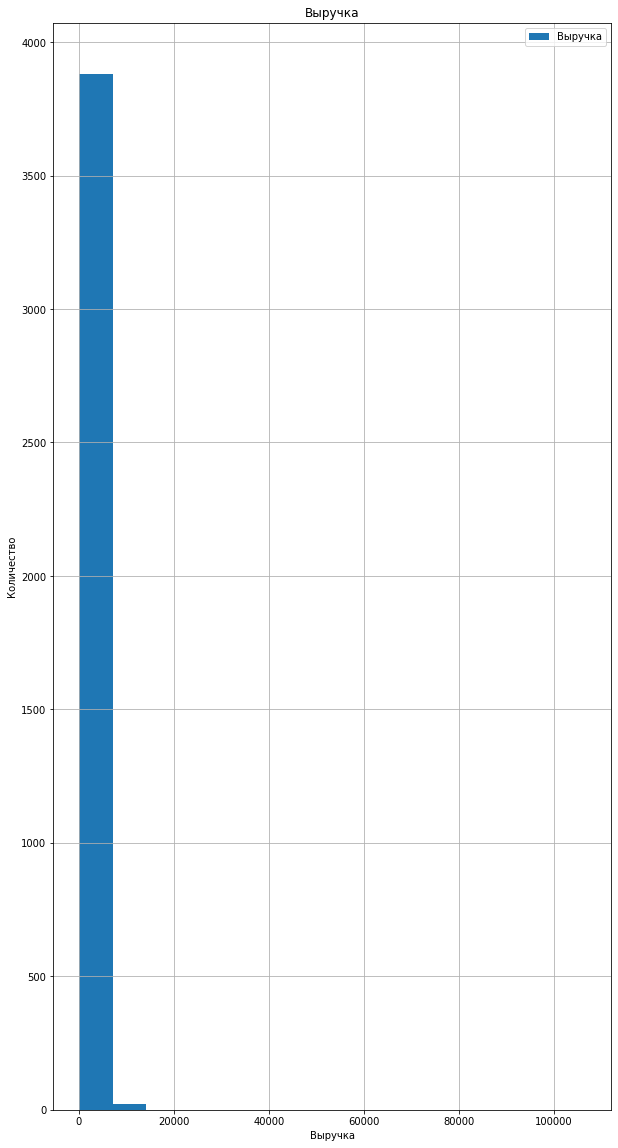

In [74]:
(market_money['Выручка']).hist(figsize=(10, 20),bins=15, legend=True)
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.title("Выручка");

Исходя из графика у нас явно имеются выбросы в атрибуте Выручка

Избавимся от этой проблемы удалим значения более 20000

In [75]:
market_money=market_money[market_money['Выручка']<20000]

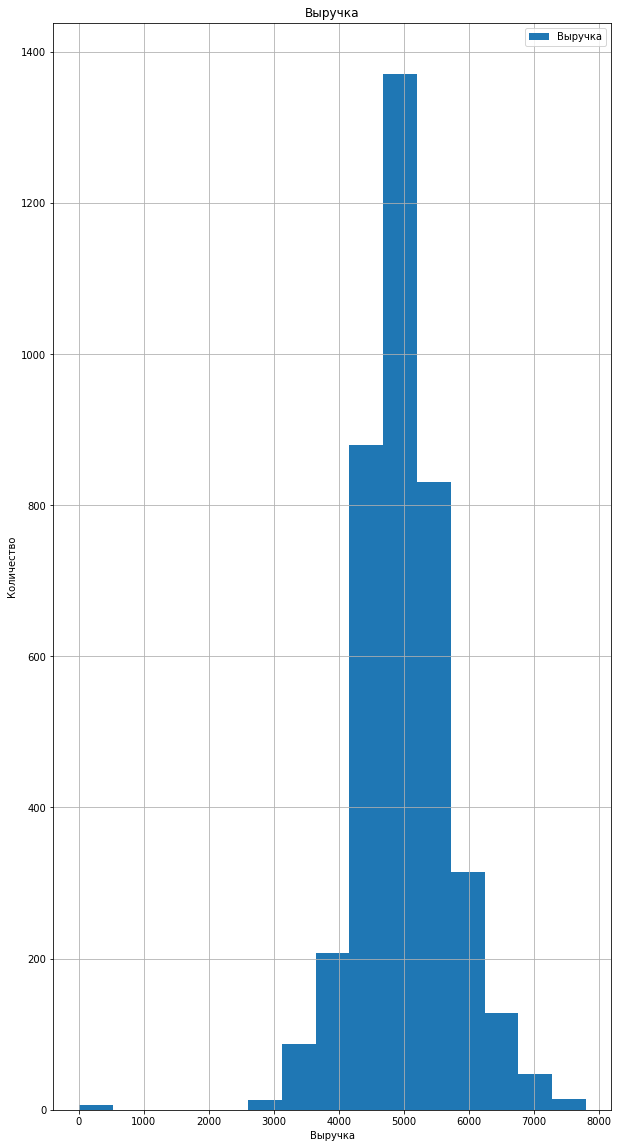

In [76]:
(market_money['Выручка']).hist(figsize=(10, 20),bins=15, legend=True)
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.title("Выручка");

### Проведем статистический анализ всех признаков в датасете market_time

In [77]:
market_time

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


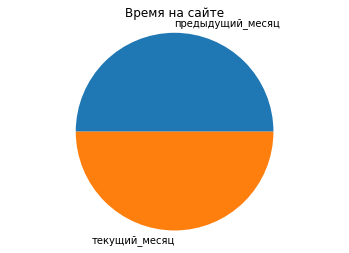

In [78]:
graf=market_time.groupby('Период')['Период'].count()
vals = graf
labels =graf.index
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.title("Время на сайте")
plt.show()

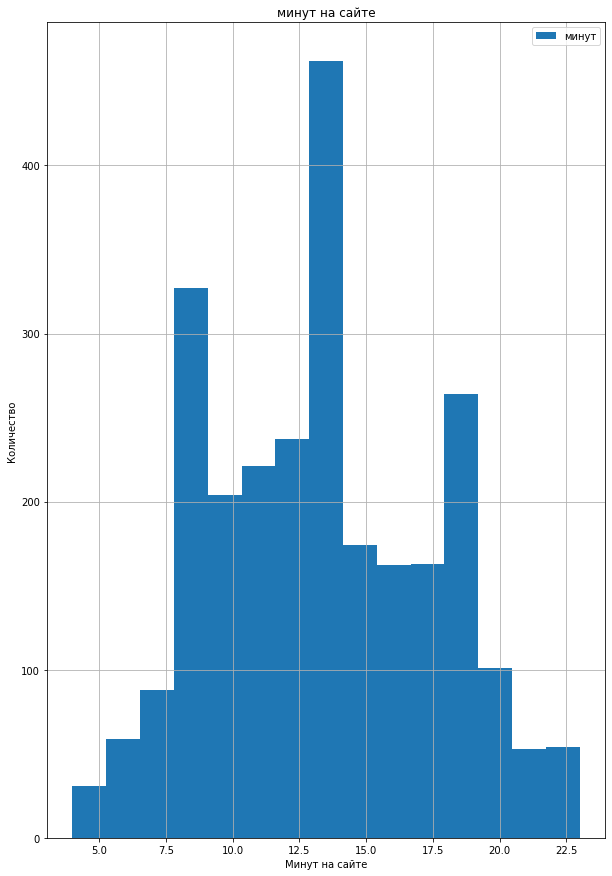

In [79]:
(market_time['минут']).hist(figsize=(10, 15),bins=15, legend=True)
plt.xlabel('Минут на сайте')
plt.ylabel('Количество')
plt.title("минут на сайте");

### Проведем статистический анализ всех признаков в датасете money

In [80]:
money

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


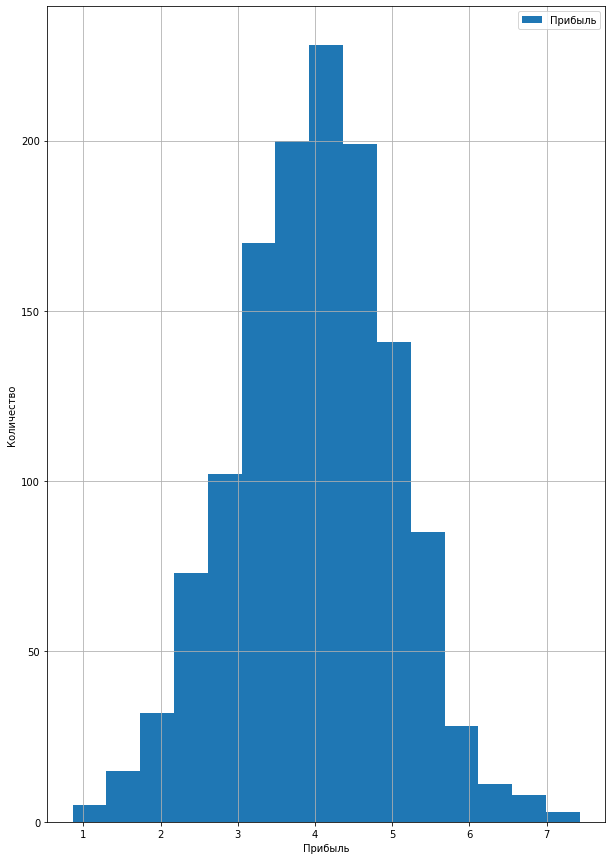

In [81]:
(money['Прибыль']).hist(figsize=(10, 15),bins=15, legend=True)
plt.xlabel('Прибыль')
plt.ylabel('Количество');

Врезультате проведенного анализа можно сделать следующие выводы:
    1) Прибыль и выручка имеют нормальное распределение
    2) Атрибуты Минут на сайте и Дней с момента регистрации имеют нормальное распределение с незначительными всплесками
    3) Доля покупок по акции не имеет нормального распределения и имеет всплеск в районе 0.9. Это скорее обусловлено особеностью датасета

В начале пункта 3 была с агрегированна выручка из таблицы market_money за последние 3 месяца, в результате только у одного пользователя в одном месяце отсутствует выручка. Согласно постановки задачи, пользователь считается активным, если в течении 3-х месяцев он совершал какие то покупки. В результате получается что все пользователи их совершали 

## Шаг 4. Объединение таблиц

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [82]:
market_file

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [83]:
market_time

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [84]:
market_money

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


In [85]:
market_money.query("Период == 'текущий_месяц'")[['id','Выручка']]

,id,Выручка
1,215348,3293.1
4,215349,4971.6
7,215350,5058.4
9,215351,6610.4
14,215352,5872.5
...,...,...
3887,216643,4741.7
3889,216644,5353.0
3892,216645,5139.2
3894,216646,5224.6


In [86]:
market_money[['id','Выручка']].set_index('id')

,Выручка
id,
215348,0.0
215348,3293.1
215348,0.0
215349,4472.0
215349,4971.6
...,...
216646,4725.0
216646,4923.0
216647,4720.0


In [87]:
market_data=market_file.set_index('id').join(market_money.query("Период == 'текущий_месяц'")[['id','Выручка']].set_index('id'), how='inner')

In [88]:
len(market_data)

1296

In [89]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1296 non-null   object 
 1   Тип_сервиса                          1296 non-null   object 
 2   Разрешить_сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит       

In [90]:
market_data=market_data.rename(columns={'Выручка': 'Выручка_текущий_месяц'})

In [91]:
market_data=market_data.join(market_money.query("Период == 'предыдущий_месяц'")[['id','Выручка']].set_index('id'), how='left')

In [92]:
market_data=market_data.rename(columns={'Выручка': 'Выручка_предыдущий_месяц'})

In [93]:
len(market_data)

1296

In [94]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1296 non-null   object 
 1   Тип_сервиса                          1296 non-null   object 
 2   Разрешить_сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит       

In [95]:
market_data=market_data.join(market_money.query("Период == 'препредыдущий_месяц'")[['id','Выручка']].set_index('id'), how='left')

In [96]:
market_data=market_data.rename(columns={'Выручка': 'Выручка_препредыдущий_месяц'})

In [97]:
len(market_data)

1296

In [98]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1296 non-null   object 
 1   Тип_сервиса                          1296 non-null   object 
 2   Разрешить_сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит       

In [99]:
market_data.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц
id,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0


In [100]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [101]:
market_data=market_data.join(market_time.query("Период == 'текущий_месяц'")[['id','минут']].set_index('id'), how='left')

In [102]:
market_data=market_data.rename(columns={'минут': 'Минут_на_сайте_текущий_месяц'})

In [103]:
len(market_data)

1296

In [104]:
market_data=market_data.join(market_time.query("Период == 'предыдущий_месяц'")[['id','минут']].set_index('id'), how='left')

In [105]:
market_data=market_data.rename(columns={'минут': 'Минут_на_сайте_предыдущий_месяц'})

In [106]:
market_data

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4741.7,3664.0,4704.0,7,14
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5353.0,4729.0,5299.0,11,12
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5139.2,5160.0,5334.0,18,12


In [107]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1296 non-null   object 
 1   Тип_сервиса                          1296 non-null   object 
 2   Разрешить_сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит       

## Шаг 5. Корреляционный анализ

Из диаграмм и графиков видно, что не все признаки распределены нормально, то здесь будем использовать корреляцию Phik 

In [108]:
market_data.phik_matrix(interval_cols=['Акционные_покупки','Маркет_актив_6_мес','Акционные_покупки','Выручка_текущий_месяц','Выручка_предыдущий_месяц','Выручка_препредыдущий_месяц'])\
    .style.background_gradient(cmap="RdYlGn")

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц
Покупательская_активность,1.000000,0.129940,0.000000,0.544831,0.000000,0.000000,0.506276,0.299717,0.539607,0.405041,0.224154,0.747331,0.197213,0.224638,0.497393,0.569983,0.604355
Тип_сервиса,0.129940,1.000000,0.289965,0.089911,0.045258,0.611909,0.030010,0.070809,0.185391,0.113015,0.079515,0.087776,0.124216,0.000000,0.069704,0.061764,0.121210
Разрешить_сообщать,0.000000,0.289965,1.000000,0.000000,0.052618,0.607184,0.012198,0.073684,0.070359,0.162524,0.021839,0.097094,0.060907,0.080842,0.000000,0.000000,0.063528
Маркет_актив_6_мес,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.217731,0.142401,0.376035,0.039795,0.155476,0.315331,0.331480,0.322830
Маркет_актив_тек_мес,0.000000,0.045258,0.052618,0.079854,1.000000,0.675822,0.000000,0.136243,0.246633,0.142887,0.116946,0.000000,0.000000,0.051824,0.000000,0.079883,0.166871
Длительность,0.000000,0.611909,0.607184,0.000000,0.675822,1.000000,0.000000,0.757563,0.766881,0.850810,0.679321,0.514092,0.113185,0.000000,0.151619,0.670135,0.213047
Акционные_покупки,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.246665,0.000000,0.350714,0.071094,0.060733,0.226381,0.287292,0.314140
Популярная_категория,0.299717,0.070809,0.073684,0.150386,0.136243,0.757563,0.122385,1.000000,0.226116,0.254746,0.000000,0.177637,0.237240,0.252097,0.043528,0.113774,0.218727
Средний_просмотр_категорий_за_визит,0.539607,0.185391,0.070359,0.206788,0.246633,0.766881,0.199180,0.226116,1.000000,0.334927,0.070315,0.293781,0.092597,0.098440,0.176828,0.236298,0.219174
Неоплаченные_продукты_штук_квартал,0.405041,0.113015,0.162524,0.217731,0.142887,0.850810,0.246665,0.254746,0.334927,1.000000,0.000000,0.310843,0.166017,0.193536,0.189320,0.158243,0.194298


Будем считать, что мультиколлинеарность возникает при  корреляции выше 0.8. 
Исходя из полученной матрицы корреляций выявлены следующие признаки с самыми сильными зависимостями: Неоплаченные продукты и Длительность. Убедем атрибут длительность из нашего датасета

In [109]:
market_data.drop('Длительность',axis=1);


## Шаг 6. Использование пайплайнов

In [110]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Выполним разбивку на выборки

In [111]:
market_data.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    market_data.drop(['Покупательская_активность'], axis=1),
    market_data['Покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_data['Покупательская_активность'])
X_train.shape, X_test.shape

((972, 16), (324, 16))

In [147]:
 y_train

id
215858    Прежний уровень
215361          Снизилась
215884    Прежний уровень
216564    Прежний уровень
215715          Снизилась
               ...       
216157    Прежний уровень
216177    Прежний уровень
215935          Снизилась
215863    Прежний уровень
216030    Прежний уровень
Name: Покупательская_активность, Length: 972, dtype: object

In [113]:
# создаём списки с названиями признаков

ohe_columns = ['Популярная_категория']
ord_columns= ['Разрешить_сообщать','Тип_сервиса']
num_columns = ['Маркет_актив_6_мес','Маркет_актив_тек_мес','Длительность','Акционные_покупки','Средний_просмотр_категорий_за_визит','Неоплаченные_продукты_штук_квартал','Ошибка_сервиса','Страниц_за_визит','Выручка_текущий_месяц','Выручка_предыдущий_месяц','Выручка_препредыдущий_месяц','Минут_на_сайте_текущий_месяц','Минут_на_сайте_предыдущий_месяц']

In [114]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first',  handle_unknown='ignore'))
   
    
    ]
    )

In [115]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns),
     ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ord_columns)
    ], 
    remainder='passthrough'
)

In [116]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

In [117]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акцион...
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'Выручка_текущий_месяц',
                                                   'Выручка_предыдущий_месяц',
                                                   'Выручка_препредыдущий_месяц',
                                                   'Минут_на_сайте_текущий_месяц',
                                                   'Минут_на_сайте_предыдущий_месяц']),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Разрешить_сообщать',
                                                   'Тип_сервиса'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

In [118]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(3, 4),
        'models__max_features': range(1, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
   #   словарь для модели LogisticRegression()
    {
        'models': [SVC(random_state=RANDOM_STATE,kernel='linear',probability=True)],
        #'models__kernel':['linear', 'rbf','poly'],# 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'models__degree': range(1,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
]


Так как перед нами стоит задача бинарной классификации, то в качестве метрики определим roc_auc,
т.к. важныйшим свойством AUC является инвариантность к порогу классификации и масштабу предсказаний.
И перед ними стоит задача перебора различных моделей и необходио выбрать лучшую


In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 215858 to 216030
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Тип_сервиса                          972 non-null    object 
 1   Разрешить_сообщать                   972 non-null    object 
 2   Маркет_актив_6_мес                   972 non-null    float64
 3   Маркет_актив_тек_мес                 972 non-null    int64  
 4   Длительность                         972 non-null    int64  
 5   Акционные_покупки                    972 non-null    float64
 6   Популярная_категория                 972 non-null    object 
 7   Средний_просмотр_категорий_за_визит  972 non-null    int64  
 8   Неоплаченные_продукты_штук_квартал   972 non-null    int64  
 9   Ошибка_сервиса                       972 non-null    int64  
 10  Страниц_за_визит                     972 non-null    int64  
 11  Выручка_текущий_месяц   

In [120]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
X_train
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                            

#Получим оценку качества модели на тестовой выборке
preds = randomized_search.predict(X_test)

accuracy_score(y_test, preds)

In [121]:
X_t=randomized_search.best_estimator_['preprocessor'].transform(X_test)
X_t=pd.DataFrame(X_t,columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()) 
preds = randomized_search.best_estimator_['models'].predict_proba(X_t)[:, 1]

roc_auc_score(y_test, preds)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9158678153945721

## Шаг 7. Анализ важности признаков

# 7.1 Оценим важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 

/opt/conda/lib/python3.9/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

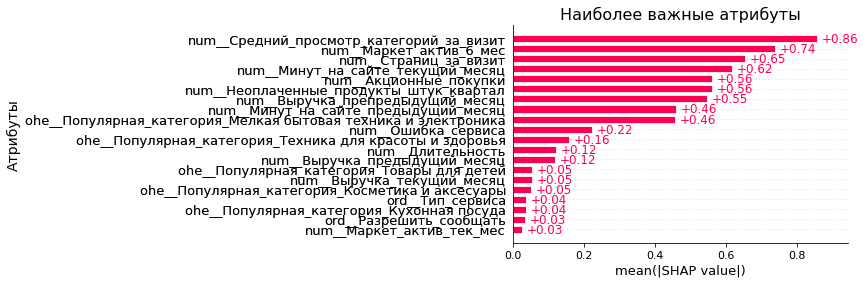

In [122]:
X=randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)
X=pd.DataFrame(X,columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()) 

#explainer = shap.TreeExplainer(randomized_search.best_estimator_['models'],X)
explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'],X, feature_perturbation="correlation_dependent")
shap_values=explainer(X[:10])





# Get the current figure and axes objects. from @GarrettCGraham code
fig, ax = plt.gcf(), plt.gca()





ax.set_title('Наиболее важные атрибуты', fontsize=16)
ax.set_xlabel('Не работает', fontsize=14)
ax.set_ylabel('Атрибуты', fontsize=14)
shap.plots.bar(shap_values,max_display=20,ax=plt.gca())



plt.show()


Из построенной диаграммы видно, что самы важный атрибуты, это атрибуты содержащие информацию о проведенном времени на сайте,  содержашие сведения о количестве страниц за визит и количество просмотренных категорий. 
Наименее значимые это: выручка, товары для детей, кухонная посуда и маркетинговые компании текущий месяц

# Шаг 8. Сегментация покупателей

Далее выделим следующие группы пользователей:Группа клиентов, которые покупают только технику, Группу клиентов, которые покупают товары из категории «Товары для детей» и Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.
Преде тем как нам начать формировать группы нам необходимо добавить предсказания по активностям клиента, а так же информацию о прибыльности.

In [123]:
market_data.head()

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10


In [124]:
market_data_temp=market_data['Покупательская_активность']

In [125]:
market_data.drop(['Покупательская_активность'],axis=1)

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц
id,,,,,,,,,,,,,,,,
215349,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
215350,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
215352,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8
215353,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4741.7,3664.0,4704.0,7,14
216644,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5353.0,4729.0,5299.0,11,12
216645,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5139.2,5160.0,5334.0,18,12


In [126]:
money=money.set_index('id')

In [127]:
market_data=market_data.join(money,how='left')


In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   ohe__Популярная_категория_Косметика и аксесуары                 972 non-null    float64
 1   ohe__Популярная_категория_Кухонная посуда                       972 non-null    float64
 2   ohe__Популярная_категория_Мелкая бытовая техника и электроника  972 non-null    float64
 3   ohe__Популярная_категория_Техника для красоты и здоровья        972 non-null    float64
 4   ohe__Популярная_категория_Товары для детей                      972 non-null    float64
 5   num__Маркет_актив_6_мес                                         972 non-null    float64
 6   num__Маркет_актив_тек_мес                                       972 non-null    float64
 7   num__Длительность                                    

In [129]:
X=randomized_search.best_estimator_['preprocessor'].transform(market_data.drop(['Покупательская_активность'], axis=1))
Y=market_data['Покупательская_активность']
X=pd.DataFrame(X,columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()) 
models_p=randomized_search.best_estimator_['models']
models_p.fit(X,Y)
market_data['pred']=models_p.predict(X)

In [130]:
market_data

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц,Прибыль,pred
id,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12,4.16,Снизилась
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8,3.13,Прежний уровень
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11,4.87,Снизилась
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8,4.21,Снизилась
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10,3.95,Снизилась
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4741.7,3664.0,4704.0,7,14,4.44,Прежний уровень
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5353.0,4729.0,5299.0,11,12,6.11,Прежний уровень
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5139.2,5160.0,5334.0,18,12,3.29,Прежний уровень


In [131]:
market_data['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Кухонная посуда', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [132]:
market_data

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Минут_на_сайте_текущий_месяц,Минут_на_сайте_предыдущий_месяц,Прибыль,pred
id,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12,4.16,Снизилась
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8,3.13,Прежний уровень
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11,4.87,Снизилась
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8,4.21,Снизилась
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10,3.95,Снизилась
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4741.7,3664.0,4704.0,7,14,4.44,Прежний уровень
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5353.0,4729.0,5299.0,11,12,6.11,Прежний уровень
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5139.2,5160.0,5334.0,18,12,3.29,Прежний уровень


Далее посмотрим как распределена Прибыль

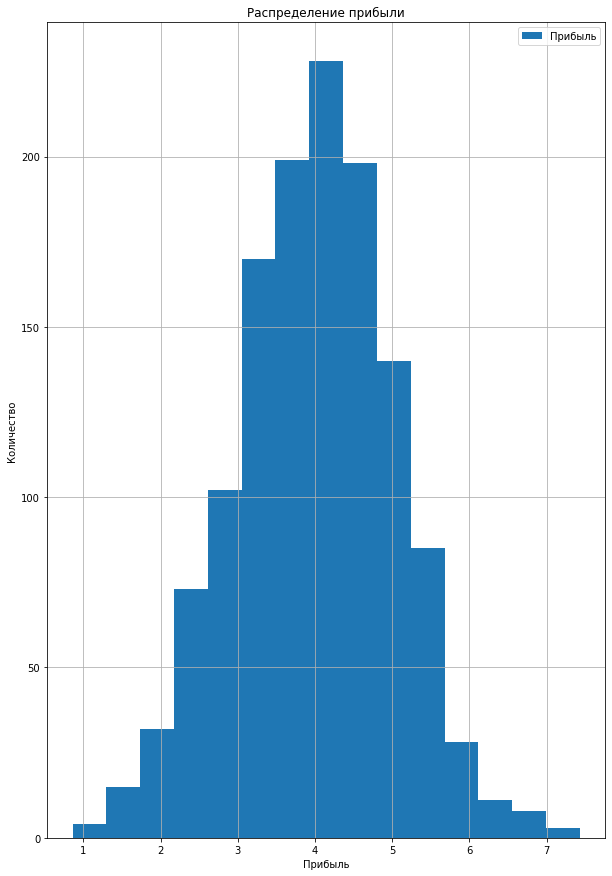

In [133]:
(market_data['Прибыль']).hist(figsize=(10, 15),bins=15, legend=True)
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Количество');

In [134]:
market_data['Прибыль'].describe()

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

Высокоприбыльными будем считать клиентов с прибылью больше 4,67 

In [135]:
market_data_vip=market_data.query("(Прибыль >= 4.67) & (pred=='Снизилась')")

In [136]:
market_data_tec=market_data.query("(Популярная_категория == 'Мелкая бытовая техника и электроника' and pred=='Снизилась') or (Популярная_категория=='Техника для красоты и здоровья' and pred=='Снизилась')")

In [137]:
market_data_child=market_data.query("Популярная_категория == 'Товары для детей' ")


Теперь для каждой из категорий выберем наиболее важные критерии и исходя из этого сформируем рекомендации для каждой из груп клиентов

In [138]:
X=market_data_vip.drop(['pred','Прибыль','Покупательская_активность'],axis=1)

/opt/conda/lib/python3.9/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

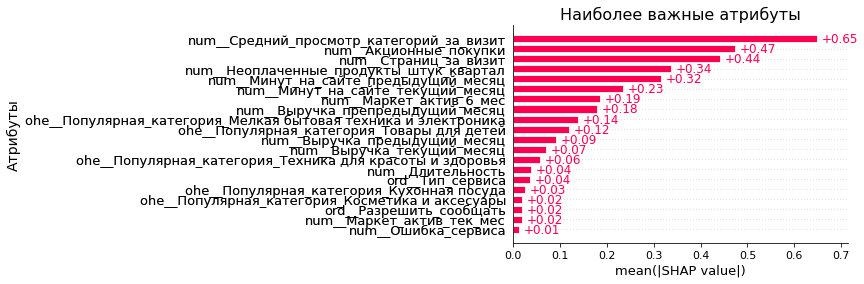

In [139]:
X=randomized_search.best_estimator_['preprocessor'].transform(X)
X=pd.DataFrame(X,columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()) 

explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'],X, feature_perturbation="correlation_dependent")
shap_values=explainer(X[:10])

fig, ax = plt.gcf(), plt.gca()
ax.set_title('Наиболее важные атрибуты', fontsize=16)
ax.set_xlabel('Не работает', fontsize=14)
ax.set_ylabel('Атрибуты', fontsize=14)
shap.plots.bar(shap_values,max_display=20,ax=plt.gca())



plt.show()
#shap.plots.bar(shap_values,max_display=20)

In [140]:
X=market_data_tec.drop(['pred','Прибыль','Покупательская_активность'],axis=1)

/opt/conda/lib/python3.9/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

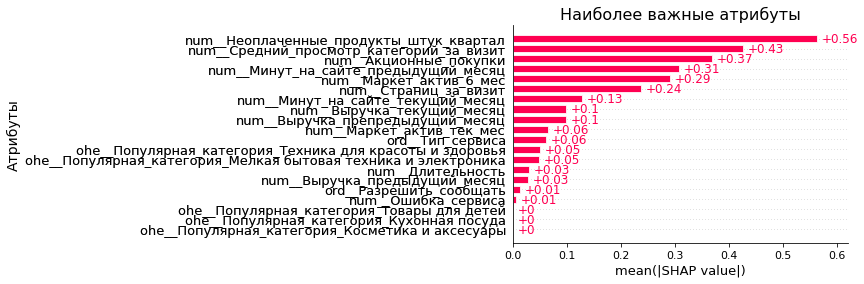

In [141]:
X=randomized_search.best_estimator_['preprocessor'].transform(X)
X=pd.DataFrame(X,columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()) 

explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'],X, feature_perturbation="correlation_dependent")
shap_values=explainer(X[:10])
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Наиболее важные атрибуты', fontsize=16)
ax.set_xlabel('Не работает', fontsize=14)
ax.set_ylabel('Атрибуты', fontsize=14)
shap.plots.bar(shap_values,max_display=20,ax=plt.gca())



plt.show()

In [142]:
X=market_data_child.drop(['pred','Прибыль','Покупательская_активность'],axis=1)

/opt/conda/lib/python3.9/site-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

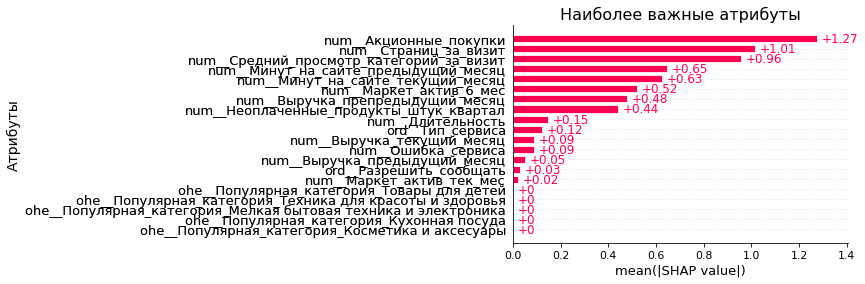

In [143]:
X=randomized_search.best_estimator_['preprocessor'].transform(X)
X=pd.DataFrame(X,columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out()) 

explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'],X, feature_perturbation="correlation_dependent")
shap_values=explainer(X[:10])
fig, ax = plt.gcf(), plt.gca()
ax.set_title('Наиболее важные атрибуты', fontsize=16)
ax.set_ylabel('Атрибуты', fontsize=14)
shap.plots.bar(shap_values,max_display=20,ax=plt.gca())



plt.show()

Нами были сформированны 3 группы клиентов. Далее более детально опишем их особенности.
Для группы клиентов, приносят набольшую прибыль, наиболее важные критерии влияющие на покупаательскую активность это:средний просмотр категорий за визит,  акционные покупки,  страниц за визит и минут на сайте предыдущий месяц.
Для данной категори получается чем больше страниц и чем больше страниц они смотрят, тем больше они покупают. 
При этом акции влияют так же сильно. 
    Исходя из этого можно предложить акцию, по которой при покупке товаров из разных категорий будет формироваться дополнительная скидка для подобных клиентов. Тем самым мы побудим данных клиентов посматривать больше категорий и страниц, тем самым будет поддерживатся высокая покупательсткая активность.


Для группы клиентов, которые покупают только технику, наиболее важные критерии влияющие на покупаательскую активность это:неоплаченные товары, акционные покупки,  минут на сайте предыдущий месяц  и средний просмотр категорий за визит.
Данная категория клиентов подходит к выбору осознано и ждет акций для совершения крупных покупок. Об этом нам свидетельствует
большое количиство товаров в корзине.
    Исходя из этого, необходимо особо активно информировать о различных новинках из интерисующей их категории, тем самым мы повысим количество просмотров страниц, тем самым увеличим количество товаров в корзине. Что в свою очередь приведет к поддержанию высокой активности

Для группы клиентов, которые покупают Товары для детей, наиболее важные критерии влияющие на покупаательскую активность это:акционные покупки, страниц за визит, выручка за препредыдущий месяц и средний просмотр категорий за визит.
ЖДля данной категории предложить акции на дешевые товары из разных категорий, тем самым повысим количество просмотров различных категорий и страниц с товарами, тем самым будем поддерживать покупательскую способность



по оси Y расположены наименования показателей, чего именно нехватает?

## Шаг 9. Общий вывод

Сделайте общий вывод:
опишите задачу;
опишите исходные данные и проведённую предобработку;
напишите, что вы сделали для поиска лучшей модели;
укажите лучшую модель;
добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

 разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Перед нами стоит задача в форировании персонализированных предложений.
Исходные данные находились в нескольких таблицах:
--Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении
id — номер покупателя в корпоративной базе данных.
--Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
--Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
--Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому.
Далее была выполнена предобработка данных и проведен исследовательский анализ.
В исследовательском анализе принимали участие  клиенты с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период
После чего сведения из трех таблиц были объеденины.
Далее мы приступили к подбору наилучшей модели с гиперпараметрами, в результате была получаена 
SVC(degree=6, kernel='linear', random_state=42).
При помощи ее мы смогли полигить прогнозные значение покупательской активности.
После чего сформировали группы пользователей сайта и сформировали предложения для каржой из груп основываясь на важности критериев. 
Нами были сформированны 3 группы клиентов. Далее более детально опишем их особенности.
Для группы клиентов, приносят набольшую прибыль, наиболее важные критерии влияющие на покупаательскую активность это:средний просмотр категорий за визит,  акционные покупки,  страниц за визит и минут на сайте предыдущий месяц.
Для данной категори получается чем больше страниц и чем больше страниц они смотрят, тем больше они покупают. 
При этом акции влияют так же сильно. 
    Исходя из этого можно предложить акцию, по которой при покупке товаров из разных категорий будет формироваться дополнительная скидка для подобных клиентов. Тем самым мы побудим данных клиентов посматривать больше категорий и страниц, тем самым будет поддерживатся высокая покупательсткая активность.


Для группы клиентов, которые покупают только технику, наиболее важные критерии влияющие на покупаательскую активность это:неоплаченные товары, акционные покупки,  минут на сайте предыдущий месяц  и средний просмотр категорий за визит.
Данная категория клиентов подходит к выбору осознано и ждет акций для совершения крупных покупок. Об этом нам свидетельствует
большое количиство товаров в корзине.
    Исходя из этого, необходимо особо активно информировать о различных новинках из интерисующей их категории, тем самым мы повысим количество просмотров страниц, тем самым увеличим количество товаров в корзине. Что в свою очередь приведет к поддержанию высокой активности

Для группы клиентов, которые покупают Товары для детей, наиболее важные критерии влияющие на покупаательскую активность это:акционные покупки, страниц за визит, выручка за препредыдущий месяц и средний просмотр категорий за визит.
ЖДля данной категории предложить акции на дешевые товары из разных категорий, тем самым повысим количество просмотров различных категорий и страниц с товарами, тем самым будем поддерживать покупательскую способность